# En notebook for å lage clustre fra kollokasjoner

Ord danner clustre via en kollokasjonsanalyse. Her litt engelsk forklaring:

The term collocation has traditionally been restricted to words that are juxtaposed together as phrases like “strong coffee”, “strict regime” or “eat dinner”. Here we take collocations to be realized as skipgrams, or as word pairs that simply cooccur within a context which in itself is a contiguous sequence of words, typically a paragraph or a window of n words around a given word. Juxtaposed collocates will also be part of the result set. 

The collocates for a word are those words that are associated with it based on a particular measure of association. Collocations can be viewed as discourse markers for a given word, in the sense that the collocates are deemed to have a special meaning when uttered (written or spoken) together with it, so that the word with its collocates constitute a complex sign. 



Start med å importere de kommandoene som trengs fra nbtext og graph_networkx_louvain. Den siste har funksjonalitet for å lage grafer fra clustre.

In [1]:
from module_update import update

Updated file nbtext.py
Updated file nbpictures.py


In [2]:
update('graph_networkx_louvain')

Updated file graph_networkx_louvain.py


In [3]:
import nbtext as nb
from nbtext import cloud, get_urn, Cluster, Corpus
import graph_networkx_louvain as gnl
%matplotlib inline

In [4]:
import imp
imp.reload(gnl)

<module 'graph_networkx_louvain' from 'C:\\Users\\larsj\\Documents\\NB_API_Python-master\\graph_networkx_louvain.py'>

### Definer et cluster for et ord over en gitt periode fra bøker eller aviser

In [6]:
mcluster = Cluster(
    'rifle', 
    period=(1970, 1980), 
    before=5, 
    after=5, 
    corpus='bok',
    reference=150, 
    word_samples=500)

# Inspiser clustre

Hvilke ord er knyttet til clustringsordet, er det variasjon i kontekst, trengs det mer data. Er resultatet tolkbart?

In [29]:
mcluster.cluster_set(top=50, exponent=1.001, aslist=False)

,rifle
hadde,1.990725
;,1.990264
a,1.989903
Han,1.989571
den,1.989393
fra,1.989381
et,1.989369
seg,1.989105
ikke,1.989051
har,1.989037


In [8]:
mcluster.search_words('Herre Kristus Pilatus bønn katekisme . , ; : og i på',exponent=1.01)

,rifle
;,1.904750
på,1.815584
:,1.011805
og,0.393973
",",0.367353
.,0.345462
i,0.269569


# Tegn en ordsky


kommandoen for å tegne en ordsky er *cloud()*. Argumentet kan være mange ting, så lenge det kobler et ord til et tall. Datarammer som består av en kolonne fungerer fint.

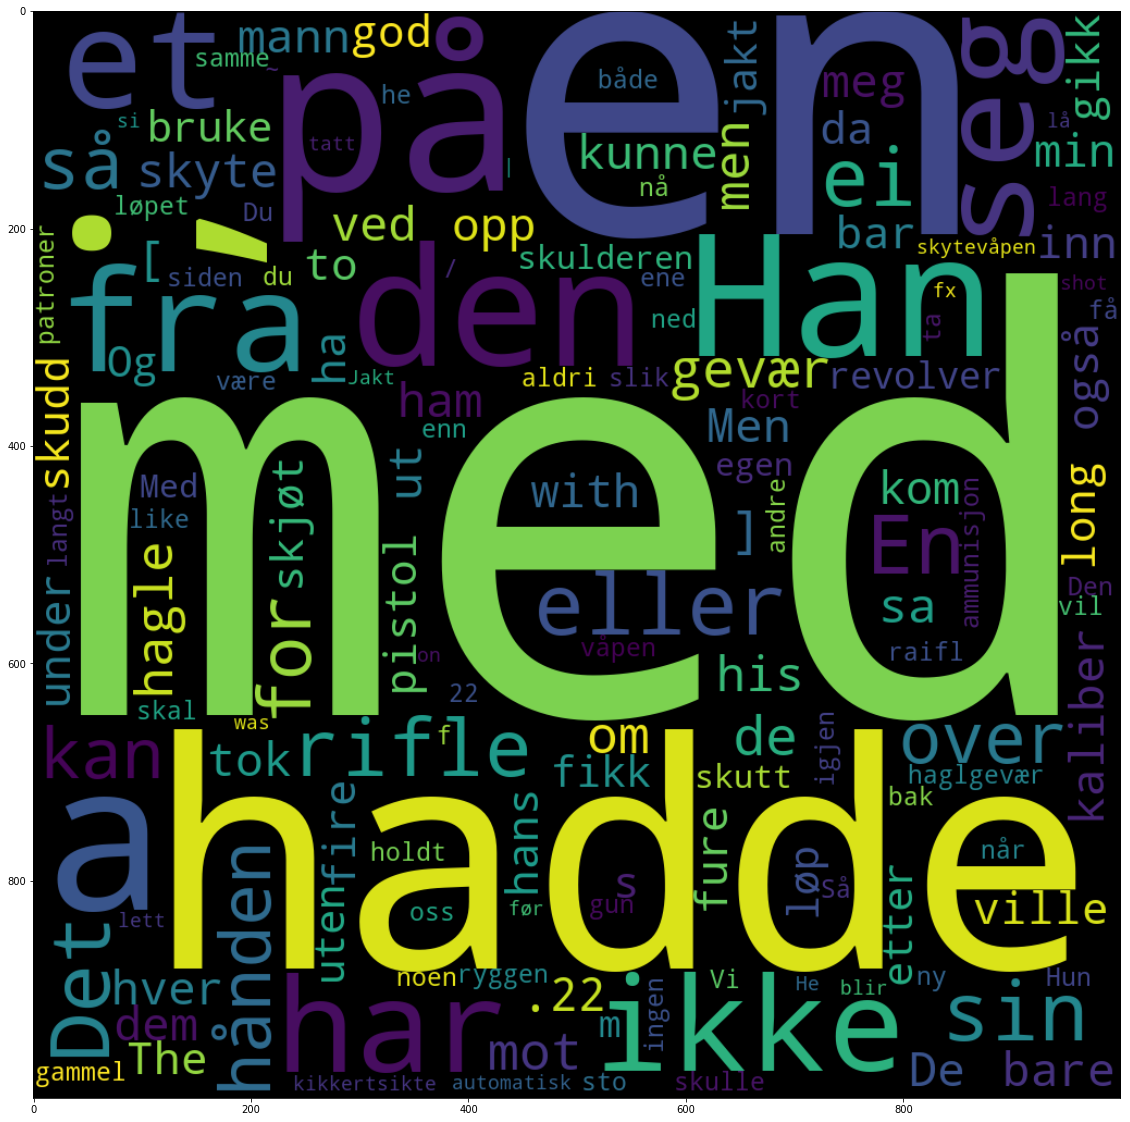

In [10]:
nb.cloud(mcluster.cluster_set(aslist=False)[:150], background='black')

### Informasjon om Dewey-systemet
Sjekk ut [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html), for å se klassifikasjonssystemet.

*cutdown()* brukes for å begrense grafer.

In [17]:
cutdown = lambda x: x.subgraph([n[0] for n in x.degree() if n[1]>1])

In [13]:
korpus = nb.get_urn({'ddk':'799%', 'limit':30})

In [14]:
korpus

[[2012111406173, 'Eide, Hjalmar', 'Moderne isfiske', 1980],
 [2015090706088, 'Torp Jacobsen, Preben', 'Fluer, fisk og fiskere', 1980],
 [2007060801027, 'Hakkelberg, Waldemar', 'Til fjells etter fisk', 1976],
 [2014062305077, 'Gjems, Sven R.', 'Storjegere i Østerdalene', 1986],
 [2013103006070, '', 'ABC for jegerprøven', 1992],
 [2010052703020, 'Gorboe, Rolf', 'Det tapte paradis', 1997],
 [2011040806009, 'Tufte, Thorbjørn', 'Fanteliv med fiskestang', 1970],
 [2015070908135,
  'Reimers, Eigil',
  '1000 spørsmål og svar til jegerprøven',
  1984],
 [2007030901037, 'Lidman, Hans', 'Laksesprang og ørretvak', 1960],
 [2016051148112, 'Mølmen, Øystein', 'Jakt og fangst i Norddal', 2000],
 [2007072400035, 'Lidman, Hans', 'Standplass ved Djuphølen', 1970],
 [2007080200058, 'Saabye, Svend', 'Lystfiskerliv', 1970],
 [2012011906069, 'Kirkemo, Ole', 'Mens solen stiger', 1994],
 [2016112148555,
  '',
  'Kristiansand jeger- og fiskerforening gjennom 50 år',
  1960],
 [2016041148118, 'Hjulstad, Ola', 'N

## Lag et nettverk basert på kaskade av kollokasjoner

Vi starter med et ord, og finner alle kollokasjonene for det. For hvert ord i blandt de beste kollokasjonsordene, lages en ny kollokasjon basert på samme korpus.

Kommandoen `make_collocation()` tar parametret `urns`, som typisk vil være resultatet av en `get_urn()`, der `cutoff`sier hvor høy frekvens ord i korpuset skal ha for å telle med, noe som gjør at en unngår spesielle ord (OCR-feil og annet). Parametret `top` forteller hvor mange ord fra hver kollokasjon som skal være med.

In [15]:
data = gnl.make_collocation_graph('rifle', urns=korpus, cutoff=30, top=30)

In [21]:
data_cut = cutdown(data)

## Graf uten løvnoder (bruk cutdown)

Grafen tegnes med en fargelegging av nodene. Noder med samme farge tilhører samme louvain-cluster. Ellers vil grupperingen passe til klikk-strukturen.

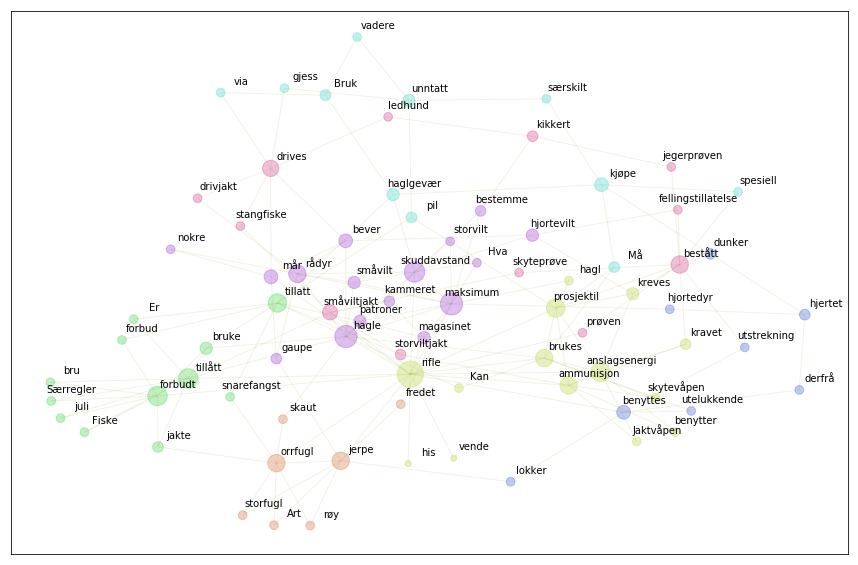

In [22]:
gnl.show_graph(data_cut)

In [18]:
gnl.show_cliques(data)

(3, 1) prosjektil, Jaktvåpen, anslagsenergi, brukes, Må, kravet, Kan, magasinet, storvilt, bestemme, bever, tillatt, Hva, maksimum, småvilt, kreves, patroner, rifle, bruke, småviltjakt, rådyr, ammunisjon, benytter, hagle, skuddavstand, tillått

(3, 2) rifle, Art, orrfugl, storfugl, røy, jerpe

(3, 3) drives, bever, mår

(4, 1) rifle, skuddavstand, rådyr, hagle, maksimum, småvilt

(4, 2) rifle, prosjektil, anslagsenergi, brukes, ammunisjon

(5, 1) skuddavstand, hagle, rådyr, maksimum, småvilt



In [24]:
gnl.show_community(data_cut)

1 rifle, prosjektil, vende, Jaktvåpen, anslagsenergi, brukes, kravet, Kan, ammunisjon, benytter, his, skytevåpen, hagl, kreves

2 bru, bruke, Fiske, snarefangst, Særregler, Er, forbudt, jakte, juli, tillatt, forbud, tillått

3 vadere, Må, pil, Bruk, gjess, unntatt, spesiell, via, særskilt, haglgevær, kjøpe

4 benyttes, hjortedyr, utelukkende, lokker, dunker, utstrekning, derfrå, hjertet

5 patroner, skuddavstand, kammeret, mår, nokre, rådyr, magasinet, gaupe, storvilt, hjortevilt, bestemme, hagle, bever, Hva, maksimum, småvilt

6 drivjakt, storviltjakt, småviltjakt, prøven, drives, skyteprøve, ledhund, kikkert, bestått, jegerprøven, fellingstillatelse, stangfiske

7 orrfugl, storfugl, røy, skaut, Art, jerpe, fredet



In [25]:
gnl.show_community(data)

1 elg, plikter, magasinet, årsaken, fremragende, Neste, maksimum, rifle, patroner, tegninger, bukk, drivjakt, rådyr, nokre, hagle, skuddavstand, jakter, funksjon, tenner, kammeret, fastsatt, storvilt, Hvilke, bestemme, Hva, forsvarlig, døgnet, småvilt, hjort, skudd, oppgitt, pen, settes, effektive, artikler, rev, villrein, korn, fredet

2 Jaktvåpen, Rælingen, kravet, hastighet, mulighetene, menes, krav, oppbevares, storviltjakt, joule, forskrifter, ammunisjon, statsgrunn, frie, retten, våpen, tomt, anslagsenergi, All, fordeler, Spørsmål, solgt, stangfiske, tilstrekkelig, småviltjakt, benytter, Jegerne, minste

3 prosjektil, Må, pil, treffes, dunker, populær, oppnådde, hest, enklere, pleide, kule, alminnelige, tillatelse, fiskekort, særskilt, kjøpe, hagl, sørget, kraft, rifler, ødelegge

4 bru, søkke, Er, jakte, avstanden, tillatt, strekning, lede, kun, Fiske, fly, forbud, haglgevær, DVF, august, forbudt, private, september, bruke, sikter, landskapet, snarefangst, Særregler, juli, uteno

## Grafen uten kutt - alle løvnodene er med

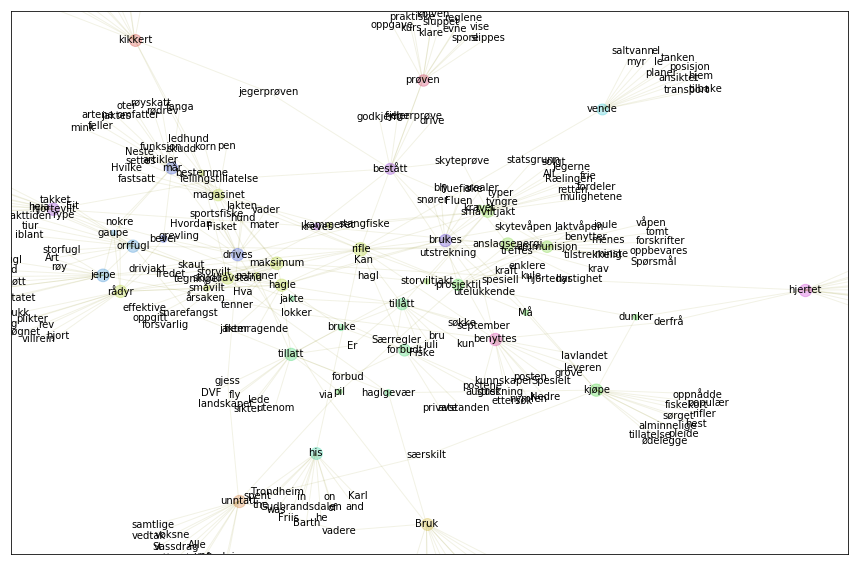

In [26]:
gnl.show_graph(data, deltax=0, deltay=0, spread=0.09)

In [28]:
nb.central_betweenness_characters(data_cut, n=20)

[('rifle', 0.41355943724329436),
 ('hagle', 0.13114972658968085),
 ('skuddavstand', 0.11788638089411047),
 ('maksimum', 0.11165314093746422),
 ('tillått', 0.09349854005830482),
 ('prosjektil', 0.08931090260080485),
 ('tillatt', 0.0752792550522004),
 ('drives', 0.07284972411554691),
 ('haglgevær', 0.06477126071560904),
 ('jerpe', 0.06255719829234921),
 ('mår', 0.06088146499538906),
 ('bestått', 0.05992371795682409),
 ('benyttes', 0.05970559517297587),
 ('orrfugl', 0.05785147604337108),
 ('småviltjakt', 0.05757523067649649),
 ('brukes', 0.0557421200707639),
 ('forbudt', 0.051725330961012915),
 ('ammunisjon', 0.04981234190094949),
 ('rådyr', 0.04338624338624339),
 ('anslagsenergi', 0.04242048657822758)]

In [36]:
nb.central_characters(data_cut, n=50)

[('rifle', 0.22784810126582278),
 ('maksimum', 0.16455696202531644),
 ('hagle', 0.16455696202531644),
 ('skuddavstand', 0.13924050632911392),
 ('anslagsenergi', 0.12658227848101267),
 ('forbudt', 0.12658227848101267),
 ('tillått', 0.12658227848101267),
 ('prosjektil', 0.11392405063291139),
 ('tillatt', 0.11392405063291139),
 ('bestått', 0.10126582278481013),
 ('rådyr', 0.10126582278481013),
 ('ammunisjon', 0.10126582278481013),
 ('jerpe', 0.10126582278481013),
 ('brukes', 0.10126582278481013),
 ('orrfugl', 0.10126582278481013),
 ('drives', 0.08860759493670886),
 ('småviltjakt', 0.0759493670886076),
 ('bever', 0.06329113924050633),
 ('kjøpe', 0.06329113924050633),
 ('mår', 0.06329113924050633),
 ('benyttes', 0.06329113924050633),
 ('magasinet', 0.05063291139240506),
 ('patroner', 0.05063291139240506),
 ('unntatt', 0.05063291139240506),
 ('hjortevilt', 0.05063291139240506),
 ('haglgevær', 0.05063291139240506),
 ('småvilt', 0.05063291139240506),
 ('kreves', 0.05063291139240506),
 ('bruke'

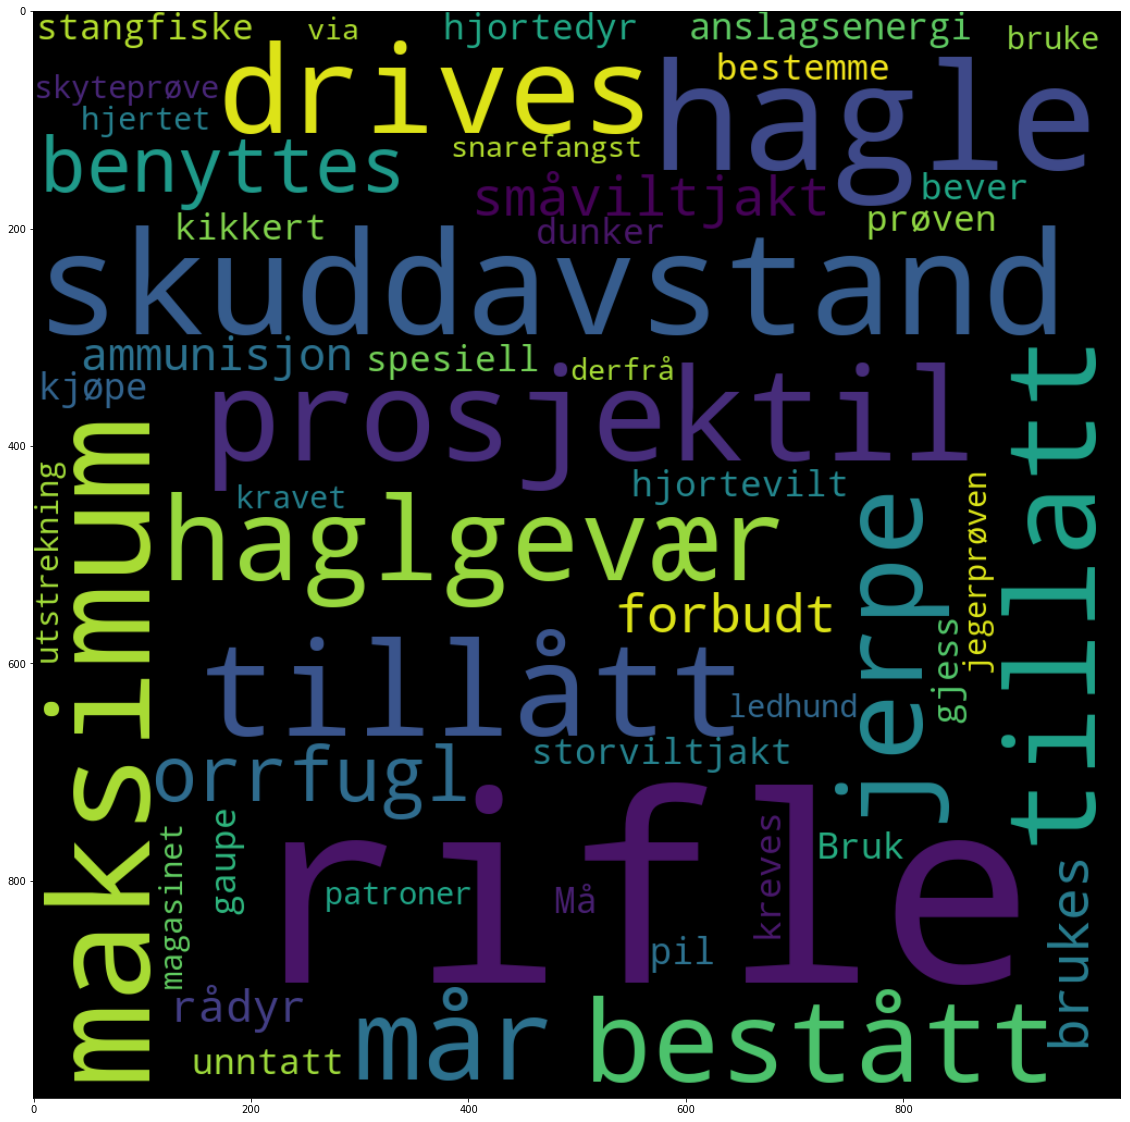

In [37]:
nb.cloud(nb.frame(dict(nb.central_betweenness_characters(data_cut, n=50)),'f'))